In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
def deal2(data:pd.DataFrame,ind:str):
    # total
    # ind = 'kdelta'# 'tau','input_expr','kdelta'
    exprs = data[ind].drop_duplicates().to_list() 
    ls = []
    data[['obj','delta','KownBest']] = data[['obj','delta','KownBest']].astype(float)
    data['gap'] = data['delta'] / data['KownBest']
    for ex in exprs:
        temp = data[data[ind]==ex] 
        ll = [ex]
        ll.append(len(temp))
        ll.append(temp['gap'].mean())
        ls.append(ll)
    out = pd.DataFrame(ls,columns=[ind,'n','gap'])
    return out

In [3]:
def deal3(data:pd.DataFrame,ind:str):
    # total
    # ind = 'kdelta'# 'tau','input_expr','kdelta'
    hue =  'Item_Num'# 'Ins_Name'
    exprs = data[ind].drop_duplicates().to_list()
    sets = data[hue].drop_duplicates().to_list()
    ls = []
    data[['obj','delta','KownBest']] = data[['obj','delta','KownBest']].astype(float)
    data['gap'] = data['delta'] / data['KownBest']
    for ex in exprs:
        for s in sets:
            temp = data[(data[ind]==ex)&(data[hue]==s)] 
            ll = [ex,s]
            ll.append(len(temp))
            ll.append(temp['gap'].mean())
            ls.append(ll)
    out = pd.DataFrame(ls,columns=[ind,'sets','n','gap'])
    return out

In [4]:
data = pd.read_excel("./ana/res_4_1000_.xlsx")
data = data[data['check']=='No-mistake!!']

In [5]:
ind = 'input_expr'# 'tau','input_expr','kdelta'
ana = deal2(data,ind)
ana2 = deal3(data,ind)

<AxesSubplot:xlabel='input_expr', ylabel='gap'>

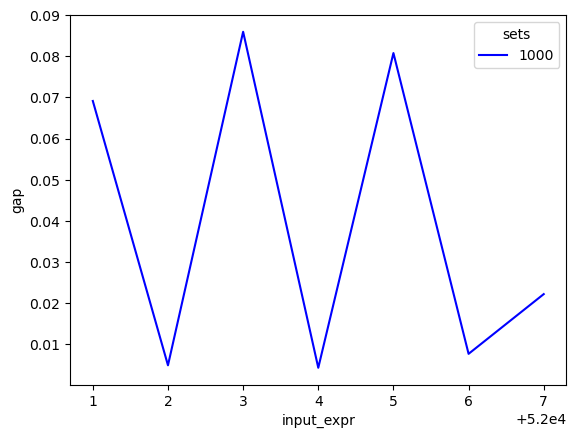

In [6]:

# plt.ylim(0.001,0.005)
# plt.ylim(0.0414,0.0417)
sns.lineplot(data=ana2,x=ind,y='gap',hue='sets',palette='winter')
# sns.lineplot(data=ana,x=ind,y='gap',)